In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words=open('names.txt','r').read().splitlines()

In [3]:
len(words)

32033

In [7]:
#build voabulary of character and mapping to/from integrers
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
#write the logic of above code

In [8]:
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [168]:
#build the data set

block_size=3 #context lenght: how many inputs/characters we take to predict next char
X,Y=[],[] #X are the inputs to NN, Y is the label for each input inside X

for w in words[:1]: #gives the name/word ,first 5 so in loop it is emma
    print(w)
    context=block_size*[0]   #1st loop : [0,0,0]
    for ch in w + '.':       #adds . to the name and gives the  letter here e
        ix=stoi[ch]          #gives corresponding int value of e and stores in ix
        X.append(context)    #adds [0,0,0] to X,list inside list
        Y.append(ix)         #add ix to Y, here for e
        print(''.join(itos[i] for i in context),'--->',itos[ix])
        context=context[1:]+ [ix] #crop and append: before starting for m (next letter in emma), removes first 0 from context and adds the value of e as third elemnt in context 
        
X=torch.tensor(X)
Y=torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .


In [21]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [22]:
Y

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# so when ... is input e is the label, ie 0,0,0 and 5 respectively, 
#if change block size to x we taking x inputs to predict x+1th char

In [169]:
#build the data set

block_size=3 #context lenght: how many inputs/characters we take to predict next char
X,Y=[],[] #X are the inputs to NN, Y is the label for each input inside X

for w in words[:5]: #gives the name/word ,first 5 so in loop it is emma
    print(w)
    context=block_size*[0]   #1st loop : [0,0,0]
    for ch in w + '.':       #adds . to the name and gives the  letter here e
        ix=stoi[ch]          #gives corresponding int value of e and stores in ix
        X.append(context)    #adds [0,0,0] to X,list inside list
        Y.append(ix)         #add ix to Y, here for e
        print(''.join(itos[i] for i in context),'--->',itos[ix])
        context=context[1:]+ [ix] #crop and append: before starting for m (next letter in emma), removes first 0 from context and adds the value of e as third elemnt in context 
        
X=torch.tensor(X)
Y=torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [25]:
#write a NN which takes X and predicts Y
# 27 possible char and embed in 2 dimentional space: Lookup table

In [29]:
C=torch.randn((27,2))
print(C)# weights initialized randomly, matrix c of embedding

tensor([[-0.6207,  0.0059],
        [-1.0589,  0.8934],
        [ 1.1340, -0.4418],
        [-1.2516,  0.6136],
        [-1.8992,  1.0459],
        [ 0.2416,  0.3255],
        [-0.2781,  1.7812],
        [ 0.4611, -0.2713],
        [-0.3733,  1.3076],
        [-0.7259,  0.2654],
        [ 0.1460,  0.7682],
        [ 0.7569,  0.0990],
        [-0.7252, -1.3505],
        [-0.4955,  0.8390],
        [ 0.3995,  0.2891],
        [ 0.2624,  1.9903],
        [ 0.5670,  0.7334],
        [-0.0364,  0.4822],
        [-0.0532,  1.1127],
        [ 0.5514, -0.4101],
        [ 1.0611, -0.1791],
        [ 0.7898, -0.6618],
        [-0.4426,  0.9759],
        [-1.2491,  0.6367],
        [-1.1948, -0.8110],
        [-0.1587,  0.6298],
        [-0.4159,  0.0736]])


In [30]:
# embedd single indi int say 5
#two ways to do this

In [31]:
#1
C[5]

tensor([0.2416, 0.3255])

In [35]:
#2: OHE
F.one_hot(torch.tensor(5),num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C


tensor([0.2416, 0.3255])

In [ ]:
'''[0000100---0]1x27 *  _   _   =[_,_]1x2
                    |    | 
                    |    |
                    |_  _|27x2
                    
                    
                    
                    
                    
                    '''



In [39]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [40]:
# same result
# we will use former the indexing bcx faster: index int and use embedding int
# embedding a single int like 5 is easy : C[5] but we have to do this for X which is 32,3

In [42]:
C[[5,6,7]] #index with list:allowed

tensor([[ 0.2416,  0.3255],
        [-0.2781,  1.7812],
        [ 0.4611, -0.2713]])

In [45]:
C[torch.tensor([5,6,7,7,7,7])] #indexing with tensor and repetition allowed

tensor([[ 0.2416,  0.3255],
        [-0.2781,  1.7812],
        [ 0.4611, -0.2713],
        [ 0.4611, -0.2713],
        [ 0.4611, -0.2713],
        [ 0.4611, -0.2713]])

In [46]:
C[X]                  #indexing with multidimentional tensor allowed

tensor([[[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059]],

        [[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.2416,  0.3255]],

        [[-0.6207,  0.0059],
         [ 0.2416,  0.3255],
         [-0.4955,  0.8390]],

        [[ 0.2416,  0.3255],
         [-0.4955,  0.8390],
         [-0.4955,  0.8390]],

        [[-0.4955,  0.8390],
         [-0.4955,  0.8390],
         [-1.0589,  0.8934]],

        [[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059]],

        [[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.2624,  1.9903]],

        [[-0.6207,  0.0059],
         [ 0.2624,  1.9903],
         [-0.7252, -1.3505]],

        [[ 0.2624,  1.9903],
         [-0.7252, -1.3505],
         [-0.7259,  0.2654]],

        [[-0.7252, -1.3505],
         [-0.7259,  0.2654],
         [-0.4426,  0.9759]],

        [[-0.7259,  0.2654],
         [-0.4426,  0.9759],
         [-0.7259,  0.2654]],

        [[-0.4426,  0

In [47]:
C[X].shape #here 2 is the embedding vector

torch.Size([32, 3, 2])

In [49]:
X[13,2]

tensor(1)

In [51]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [52]:
X[13,2]

tensor(1)

In [53]:
C[X[13,2]]

tensor([-1.0589,  0.8934])

In [54]:
C[1]

tensor([-1.0589,  0.8934])

In [55]:
X.shape

torch.Size([32, 3])

In [ ]:
#X is the array with inputs: here  32X3 , X.append(context), context=[0]*3 and so on, C is a random array 27x2
#so C[X] is 32x3x3 which means that X is used as index to get values fro C, so if we ask for C[X][13,2] we go to X
    #and see
# X[13,2] is the element of 13th row, 2nd col (remember python starts 0) which is 1
#so C[X[13,2]]=C[1] is [-1.0589,  0.8934] which is nothing but 1st row of C 

In [65]:
#Rough work to understand this

tensor(0.8934)

In [57]:
C,X

(tensor([[-0.6207,  0.0059],
         [-1.0589,  0.8934],
         [ 1.1340, -0.4418],
         [-1.2516,  0.6136],
         [-1.8992,  1.0459],
         [ 0.2416,  0.3255],
         [-0.2781,  1.7812],
         [ 0.4611, -0.2713],
         [-0.3733,  1.3076],
         [-0.7259,  0.2654],
         [ 0.1460,  0.7682],
         [ 0.7569,  0.0990],
         [-0.7252, -1.3505],
         [-0.4955,  0.8390],
         [ 0.3995,  0.2891],
         [ 0.2624,  1.9903],
         [ 0.5670,  0.7334],
         [-0.0364,  0.4822],
         [-0.0532,  1.1127],
         [ 0.5514, -0.4101],
         [ 1.0611, -0.1791],
         [ 0.7898, -0.6618],
         [-0.4426,  0.9759],
         [-1.2491,  0.6367],
         [-1.1948, -0.8110],
         [-0.1587,  0.6298],
         [-0.4159,  0.0736]]),
 tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
        

In [62]:
Z=torch.tensor([[0,0,0],
  [0,0,5]])
Z

tensor([[0, 0, 0],
        [0, 0, 5]])

In [63]:
C[Z]

tensor([[[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059]],

        [[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.2416,  0.3255]]])

In [66]:
C[Z].shape #rough done

torch.Size([2, 3, 2])

In [67]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [68]:
#now contruct the hidden layer
#no of inputs to this layer 3*2=6 bcz we have 2 dim embedings and 3 (3 char we talked abiut as inputs) of them


W1=torch.randn((6,100)) #no of neurons is upto us here 100
b1=torch.randn(100)

In [69]:
#what we want is :
emb @ W1 + b1
#but the problem is that these emb ar stacked up in the dim of the input tensor: [32, 3, 2] ie [32, 3, 2]!*[6,100]
# somehow concatenate the inputs together

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
# many ways to implement this in torch: use cat

In [86]:
emb[:5]

tensor([[[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059]],

        [[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.2416,  0.3255]],

        [[-0.6207,  0.0059],
         [ 0.2416,  0.3255],
         [-0.4955,  0.8390]],

        [[ 0.2416,  0.3255],
         [-0.4955,  0.8390],
         [-0.4955,  0.8390]],

        [[-0.4955,  0.8390],
         [-0.4955,  0.8390],
         [-1.0589,  0.8934]]])

In [85]:
emb[:,0,:][:5]

tensor([[-0.6207,  0.0059],
        [-0.6207,  0.0059],
        [-0.6207,  0.0059],
        [ 0.2416,  0.3255],
        [-0.4955,  0.8390]])

In [88]:
emb[:,1,:][:5]

tensor([[-0.6207,  0.0059],
        [-0.6207,  0.0059],
        [ 0.2416,  0.3255],
        [-0.4955,  0.8390],
        [-0.4955,  0.8390]])

In [90]:
emb[:,2,:][:5]

tensor([[-0.6207,  0.0059],
        [ 0.2416,  0.3255],
        [-0.4955,  0.8390],
        [-0.4955,  0.8390],
        [-1.0589,  0.8934]])

In [71]:
emb[:,0,:].shape #plucks out 32x2 embedding of just the first char/letter

torch.Size([32, 2])

In [92]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [93]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)

tensor([[-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059,  0.2416,  0.3255],
        [-0.6207,  0.0059,  0.2416,  0.3255, -0.4955,  0.8390],
        [ 0.2416,  0.3255, -0.4955,  0.8390, -0.4955,  0.8390],
        [-0.4955,  0.8390, -0.4955,  0.8390, -1.0589,  0.8934],
        [-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059,  0.2624,  1.9903],
        [-0.6207,  0.0059,  0.2624,  1.9903, -0.7252, -1.3505],
        [ 0.2624,  1.9903, -0.7252, -1.3505, -0.7259,  0.2654],
        [-0.7252, -1.3505, -0.7259,  0.2654, -0.4426,  0.9759],
        [-0.7259,  0.2654, -0.4426,  0.9759, -0.7259,  0.2654],
        [-0.4426,  0.9759, -0.7259,  0.2654, -1.0589,  0.8934],
        [-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059, -1.0589,  0.8934],
        [-0.6207,  0.0059, -1.0589,  0.8934, -0.4426,  0.9759],
        [-1.0589,  0.8934, -0.4426,  0.9

In [94]:
#for generalizing block size: fn unbind

In [97]:
torch.unbind(emb,1) #list of tensors equal to [emb[:,0,:],emb[:,1,:],emb[:,2,:]]

(tensor([[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.2416,  0.3255],
         [-0.4955,  0.8390],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.2624,  1.9903],
         [-0.7252, -1.3505],
         [-0.7259,  0.2654],
         [-0.4426,  0.9759],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-1.0589,  0.8934],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.7259,  0.2654],
         [ 0.5514, -0.4101],
         [-1.0589,  0.8934],
         [ 1.1340, -0.4418],
         [ 0.2416,  0.3255],
         [-0.7252, -1.3505],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0.5514, -0.4101],
         [ 0.2624,  1.9903],
         [ 0.5670,  0.7334],
         [-0.3733,  1.3076]]),
 tensor([[-0.6207,  0.0059],
         [-0.6207,  0.0059],
         [ 0

In [98]:
len(torch.unbind(emb,1))

3

In [99]:
torch.cat(torch.unbind(emb,1),1)

tensor([[-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059,  0.2416,  0.3255],
        [-0.6207,  0.0059,  0.2416,  0.3255, -0.4955,  0.8390],
        [ 0.2416,  0.3255, -0.4955,  0.8390, -0.4955,  0.8390],
        [-0.4955,  0.8390, -0.4955,  0.8390, -1.0589,  0.8934],
        [-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059,  0.2624,  1.9903],
        [-0.6207,  0.0059,  0.2624,  1.9903, -0.7252, -1.3505],
        [ 0.2624,  1.9903, -0.7252, -1.3505, -0.7259,  0.2654],
        [-0.7252, -1.3505, -0.7259,  0.2654, -0.4426,  0.9759],
        [-0.7259,  0.2654, -0.4426,  0.9759, -0.7259,  0.2654],
        [-0.4426,  0.9759, -0.7259,  0.2654, -1.0589,  0.8934],
        [-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059, -1.0589,  0.8934],
        [-0.6207,  0.0059, -1.0589,  0.8934, -0.4426,  0.9759],
        [-1.0589,  0.8934, -0.4426,  0.9

In [100]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [101]:
#even more efficient way of doing this 

In [104]:
a=torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [105]:
#represent as diff sized n dim tensor
a.shape

torch.Size([18])

In [106]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [107]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [109]:
#above is possible bcz of
a.storage()# all no as 1 dim vector as stored in memory
#check out blog by pytorch internal by eric

C:\Users\Asus\AppData\Local\Temp\ipykernel_2416\2019216251.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()# all no as 1 dim vector as stored in memory


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [111]:
emb.view(32,6)

tensor([[-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059,  0.2416,  0.3255],
        [-0.6207,  0.0059,  0.2416,  0.3255, -0.4955,  0.8390],
        [ 0.2416,  0.3255, -0.4955,  0.8390, -0.4955,  0.8390],
        [-0.4955,  0.8390, -0.4955,  0.8390, -1.0589,  0.8934],
        [-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059,  0.2624,  1.9903],
        [-0.6207,  0.0059,  0.2624,  1.9903, -0.7252, -1.3505],
        [ 0.2624,  1.9903, -0.7252, -1.3505, -0.7259,  0.2654],
        [-0.7252, -1.3505, -0.7259,  0.2654, -0.4426,  0.9759],
        [-0.7259,  0.2654, -0.4426,  0.9759, -0.7259,  0.2654],
        [-0.4426,  0.9759, -0.7259,  0.2654, -1.0589,  0.8934],
        [-0.6207,  0.0059, -0.6207,  0.0059, -0.6207,  0.0059],
        [-0.6207,  0.0059, -0.6207,  0.0059, -1.0589,  0.8934],
        [-0.6207,  0.0059, -1.0589,  0.8934, -0.4426,  0.9759],
        [-1.0589,  0.8934, -0.4426,  0.9

In [115]:
# emb.view(emb.shape([0])) @ W1 + b1 or use view
emb.view(-1,6) @ W1 + b1


tensor([[-0.8543,  0.2955,  1.6099,  ...,  3.1177, -1.2067,  2.8979],
        [-0.6935, -1.3648,  1.7065,  ...,  2.6310, -0.3412,  2.0098],
        [ 0.7945, -1.3494, -0.6717,  ...,  3.4557,  0.4316,  1.1501],
        ...,
        [-3.6735, -0.3060, -2.3980,  ...,  3.1972,  1.1600,  1.7365],
        [-3.6674,  2.8005, -0.2152,  ...,  1.8019, -0.1070,  3.2112],
        [-3.9465, -0.4432,  0.8269,  ...,  5.5574, -0.4634,  3.2628]])

In [116]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1)


In [117]:
h

tensor([[-0.6933,  0.2872,  0.9231,  ...,  0.9961, -0.8357,  0.9939],
        [-0.6002, -0.8775,  0.9362,  ...,  0.9897, -0.3286,  0.9647],
        [ 0.6610, -0.8739, -0.5861,  ...,  0.9980,  0.4067,  0.8178],
        ...,
        [-0.9987, -0.2968, -0.9836,  ...,  0.9967,  0.8210,  0.9398],
        [-0.9987,  0.9926, -0.2119,  ...,  0.9470, -0.1066,  0.9968],
        [-0.9993, -0.4163,  0.6788,  ...,  1.0000, -0.4328,  0.9971]])

In [118]:
h.shape # this is the hidden layer of activation for our 32 examples and 100 neuron

torch.Size([32, 100])

In [126]:
b1.shape

torch.Size([100])

In [127]:
# 32,100
# 1 ,100 row vector , 1 fake created 
# same bias vector will be added to all the rows of h

# final layer

In [137]:
W2=torch.randn((100,27)) #input 100 from previous layer and out is obv 27
b2=torch.randn(27) #so biases will also be 27

In [139]:
logits=h @ W2 +b2   #logits are outputs of this nn, remember h is out put of last layer shape:32x100
logits.shape

torch.Size([32, 27])

In [142]:
counts=logits.exp() #fake counts from exp, normalise to prob

In [155]:
prob=counts/counts.sum(1,keepdim=True)

In [156]:
prob[0].sum()

tensor(1.)

In [158]:
#index into rows of prob and each row we would like to pluck out the probabilty assigned to the correct char as given below by Y

In [160]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [163]:
prob[torch.arange(32),Y]
#this gives currant probabilties as assigned by this(torch.arange(32)) neural network with this (W2) 
# setting of weights to the correct char in the sequence

#some are okay like  8.1744e-02 which is .08 but some are too small like 2.4705e-10= 0.000000000245 
# but we havent trained neural net yet

# ideally all these no should be very close to 1 for good results

tensor([8.1744e-02, 1.5757e-06, 1.2412e-05, 6.0616e-10, 3.3164e-09, 4.0265e-10,
        3.1021e-05, 1.3066e-06, 1.3981e-08, 1.0000e+00, 2.4705e-10, 2.0856e-08,
        2.0580e-10, 2.1942e-05, 1.0986e-09, 3.6561e-09, 4.5328e-01, 3.7496e-13,
        5.4310e-07, 1.9225e-11, 1.8135e-11, 1.7640e-12, 7.1803e-06, 1.0509e-04,
        1.1736e-11, 7.1027e-13, 2.3467e-10, 8.0314e-08, 1.3618e-02, 1.3769e-11,
        3.9510e-11, 6.5968e-07])

In [157]:
#actual layer from Y
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [165]:
#negative log likelihood loss
loss=-prob[torch.arange(32)].log().mean()
loss
#this is the loss we want to minimise for the network to predict properly

tensor(16.5812)

In [166]:
#-------more comprehensive----------

In [170]:
X.shape, Y.shape #dataset

(torch.Size([32, 3]), torch.Size([32]))

In [172]:
g=torch.Generator().manual_seed(2147483647) #reproducible
C=torch.randn((27,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
W2=torch.randn((100,27), generator=g)
b2=torch.randn(27, generator=g)
parameters=[C,W1,b1,W2,b2]

In [171]:
C[X].shape

torch.Size([32, 3, 2])

In [173]:
sum(p.nelement() for p in parameters) #no of parameters in total
# 27*2 + 6*100 +100 + 100*27 + 27

3481

In [175]:
emb=C[X]
h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
logits=h @ W2 +b2 #32x27
counts= logits.exp()
prob=counts/counts.sum(1,keepdims=True)
loss=-prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [176]:
# we should use pre build fn for loss

emb=C[X]
h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
logits=h @ W2 +b2 #32x27
loss=F.cross_entropy(logits,Y)
loss

tensor(17.7697)

In [178]:
# reasons as follows
#1. no need to create new tensors and save memory through fusing kernel: counts,prob: efficient forward pass
#2. Backward pass can be made more efficient
#3. numerically well behaveed, eg:
logits1=torch.tensor([-2,-3,0,5])
counts1= logits1.exp()
prob1=counts1/counts1.sum()
# loss1=-prob[torch.arange(32),Y].log().mean()
# loss1
prob1

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [180]:
#but if very positive logits, we get nan: run out of range in floating point no, can do -100  and offset so basically logits -100
logits1=torch.tensor([-2,-3,0,100])# -100
counts1= logits1.exp()
prob1=counts1/counts1.sum()
# loss1=-prob[torch.arange(32),Y].log().mean()
# loss1
prob1

tensor([5.6052e-45, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [ ]:
#forward pass

In [214]:
for p in parameters:
    p.requires_grad=True

In [220]:
for _ in range(1000):   
    emb=C[X]
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y)
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde
    for p in parameters:
        p.data+= -0.1*p.grad
        
print(loss.item())

0.251748651266098


In [221]:
#till now we only had 32 example from first 5 words (recall X), so easy to make this nn fit for 3k parameter for 32 examples
#we are not able to achieve exactly 0 , reason

In [222]:
#pytorch records both the actual values : 15.4534, 21.715... on the maximum no and also indices whcih are very close to labels Y
#9 vs 5: for ... possible outputs are e,o,a,i,a
#for unique input output better pred
logits.max(1)

torch.return_types.max(
values=tensor([15.4534, 21.7150, 22.6501, 23.3305, 19.6756, 15.4534, 18.9005, 16.4614,
        18.1132, 21.7582, 19.0179, 23.9170, 15.4534, 20.6877, 20.4342, 23.3904,
        15.4534, 19.7418, 18.9652, 20.6242, 21.0806, 19.2845, 13.8394, 13.6817,
        17.7964, 15.4534, 18.8324, 19.6703, 15.0163, 18.6938, 22.7255, 20.1244],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [223]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [224]:
#for full dataset


#build the data set

block_size=3 #context lenght: how many inputs/characters we take to predict next char
X,Y=[],[] #X are the inputs to NN, Y is the label for each input inside X

for w in words: #gives the name/word ,first 5 so in loop it is emma
#     print(w)
    context=block_size*[0]   #1st loop : [0,0,0]
    for ch in w + '.':       #adds . to the name and gives the  letter here e
        ix=stoi[ch]          #gives corresponding int value of e and stores in ix
        X.append(context)    #adds [0,0,0] to X,list inside list
        Y.append(ix)         #add ix to Y, here for e
#         print(''.join(itos[i] for i in context),'--->',itos[ix])
        context=context[1:]+ [ix] #crop and append: before starting for m (next letter in emma), removes first 0 from context and adds the value of e as third elemnt in context 
        
X=torch.tensor(X)
Y=torch.tensor(Y)

In [290]:
X.shape, X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [291]:
g=torch.Generator().manual_seed(2147483647) #reproducible
C=torch.randn((27,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn(100, generator=g)
W2=torch.randn((100,27), generator=g)
b2=torch.randn(27, generator=g)
parameters=[C,W1,b1,W2,b2]

In [292]:
sum(p.nelement() for p in parameters)

3481

In [293]:
for p in parameters:
    p.requires_grad=True

In [237]:
for _ in range(10): 
    
    #forwardpass
    emb=C[X] #(228146,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y)
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde
    for p in parameters:
        p.data+= -0.1*p.grad
        
# print(loss.item())

19.505229949951172
17.084491729736328
15.776531219482422
14.833340644836426
14.002603530883789
13.253260612487793
12.579917907714844
11.983101844787598
11.470492362976074
11.05185604095459


In [238]:
#As we notive here, t takes a lot if tme for each iteration bcz we are forwarding and backwording >200k examples
# in practice we perform Fp and Bp ib minibatches selected randomly

In [239]:
torch.randint(0,5,(32,))

tensor([1, 0, 0, 1, 1, 3, 3, 0, 1, 0, 4, 3, 0, 3, 3, 3, 4, 3, 1, 2, 0, 4, 2, 0,
        3, 2, 1, 2, 4, 1, 2, 1])

In [240]:
torch.randint(0,X.shape[0],(32,))  # this creates int that index into our dataset and theres 32 of them so our minibatch size is 32

tensor([ 96133, 124371,  74113,  82501, 201194, 210880,  80911, 212742, 220099,
        153815,   8834, 204541, 174928,  57400, 150157, 113833, 225204,  76476,
         27454, 103451, 118790, 104608,  34161, 102525, 114944, 181805, 199220,
        106520,  44028, 166113,  92750,  64817])

In [246]:
for _ in range(100): 
    
    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    
    #forward pass
    emb=C[X[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde
    for p in parameters:
        p.data+= -0.1*p.grad
        
# print(loss.item())

7.933703422546387
6.000620365142822
8.13911247253418
9.000179290771484
6.593320369720459
9.055007934570312
7.657347202301025
6.197051048278809
7.0187578201293945
6.425689220428467
7.118587493896484
7.458771705627441
6.7737321853637695
8.155210494995117
7.194069862365723
8.774280548095703
6.537813186645508
5.187815189361572
4.534985065460205
4.850400447845459
5.70827579498291
6.165180206298828
5.682713031768799
6.983326435089111
5.497468948364258
6.571448802947998
5.212042331695557
4.348809719085693
5.1240234375
5.448896408081055
6.194093227386475
4.600247383117676
5.39347505569458
6.066452503204346
4.671658992767334
5.766372203826904
4.061760425567627
3.9099063873291016
4.472407817840576
5.750327110290527
4.34683084487915
4.314275741577148
4.822473049163818
5.943849563598633
4.155023097991943
4.468928813934326
4.472998142242432
3.473346710205078
5.655151844024658
3.2892184257507324
4.634355545043945
3.7700142860412598
4.009340763092041
4.110291004180908
4.726177215576172
4.608971118927

In [247]:
#minibatch:decrease the loss much much faster but 
#quality of gradient not lower thus direction is not reliable:not actual gradient direction
#

In [248]:
#continue doing optimization

In [251]:
for _ in range(100): 
    
    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    
    #forward pass
    emb=C[X[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde
    for p in parameters:
        p.data+= -0.1*p.grad
        
print(loss.item())
# this is loss for this particular minibatch

2.920896291732788


In [258]:
#eval loss for All of X and Y

emb=C[X] #(32,3,2)
h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
logits=h @ W2 +b2 #32x27
loss=F.cross_entropy(logits,Y)
loss.item()

2.8090016841888428

In [259]:
# so now r at 2.8, lets run optimization for a while

In [264]:
for _ in range(1000): 
    
    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    
    #forward pass
    emb=C[X[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde
    for p in parameters:
        p.data+= -0.1*p.grad
        
print(loss.item())
# this is loss for this particular minibatch

2.4167394638061523


In [265]:
#eval loss for All of X and Y

emb=C[X] #(32,3,2)
h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
logits=h @ W2 +b2 #32x27
loss=F.cross_entropy(logits,Y)
loss.item()

2.570652723312378

# Learning rate

In [266]:
#how to determine learning rate what is the right speed?


In [267]:
#lets reset our parameters to initial
#try lr for 0.0001,0.001: very slow, 1,: unstable ,10: not optimizing, right lr between 0.001 and -1
        

In [271]:
torch.linspace(0.001,1,1000)#doesnt make sense to change linearly

tensor([0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080, 0.0090,
        0.0100, 0.0110, 0.0120, 0.0130, 0.0140, 0.0150, 0.0160, 0.0170, 0.0180,
        0.0190, 0.0200, 0.0210, 0.0220, 0.0230, 0.0240, 0.0250, 0.0260, 0.0270,
        0.0280, 0.0290, 0.0300, 0.0310, 0.0320, 0.0330, 0.0340, 0.0350, 0.0360,
        0.0370, 0.0380, 0.0390, 0.0400, 0.0410, 0.0420, 0.0430, 0.0440, 0.0450,
        0.0460, 0.0470, 0.0480, 0.0490, 0.0500, 0.0510, 0.0520, 0.0530, 0.0540,
        0.0550, 0.0560, 0.0570, 0.0580, 0.0590, 0.0600, 0.0610, 0.0620, 0.0630,
        0.0640, 0.0650, 0.0660, 0.0670, 0.0680, 0.0690, 0.0700, 0.0710, 0.0720,
        0.0730, 0.0740, 0.0750, 0.0760, 0.0770, 0.0780, 0.0790, 0.0800, 0.0810,
        0.0820, 0.0830, 0.0840, 0.0850, 0.0860, 0.0870, 0.0880, 0.0890, 0.0900,
        0.0910, 0.0920, 0.0930, 0.0940, 0.0950, 0.0960, 0.0970, 0.0980, 0.0990,
        0.1000, 0.1010, 0.1020, 0.1030, 0.1040, 0.1050, 0.1060, 0.1070, 0.1080,
        0.1090, 0.1100, 0.1110, 0.1120, 

In [276]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [281]:
lri=[]
lossi=[]


for i in range(1000): 
    
    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    
    #forward pass
    emb=C[X[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde 
    lr=lrs[i]              # we start with very less lr and go go upto -1
    for p in parameters:
        p.data+= -lr*p.grad 
        
        #track stats
        lri.append(lre[i])
        lossi.append(loss.item())
        
        
print(loss.item())
# this is loss for this particular minibatch

8.61003589630127


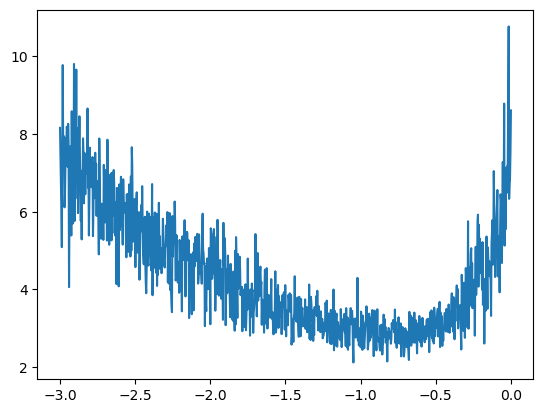

In [284]:
#plots
plt.plot(lri,lossi)

In [302]:
#finalising LR
#reset parameters

lri=[]
lossi=[]


for i in range(10000): 
    
    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    
    #forward pass
    emb=C[X[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde 
#     lr=lrs[i]              # we start with very less lr and go go upto -1
    lr=0.01
    for p in parameters:
        p.data+= -lr*p.grad 
        
        #track stats
#         lri.append(lre[i])
#         lossi.append(loss.item())
        
        
print(loss.item())
# this is loss for this particular minibatch

2.7639577388763428


In [303]:
#eval loss for All of X and Y

emb=C[X] #(32,3,2)
h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
logits=h @ W2 +b2 #32x27
loss=F.cross_entropy(logits,Y)
loss.item()

2.4635331630706787

In [298]:
#learning Rate decay: late stage of training we want to go slower

In [306]:
#finalising LR
#reset parameters

lri=[]
lossi=[]


for i in range(10000): 
    
    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    
    #forward pass
    emb=C[X[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
    logits=h @ W2 +b2 #32x27
    loss=F.cross_entropy(logits,Y[ix])
    
    #backward pass
    for p in parameters:
        p.grad=None            #set gradients to 0

    loss.backward()

    #upgarde 
#     lr=lrs[i]              # we start with very less lr and go go upto -1
    lr=0.001
    for p in parameters:
        p.data+= -lr*p.grad 
        
        #track stats
#         lri.append(lre[i])
#         lossi.append(loss.item())
        
        
print(loss.item())
# this is loss for this particular minibatch

2.435790777206421


In [307]:
#eval loss for All of X and Y

emb=C[X] #(32,3,2)
h=torch.tanh(emb.view(-1,6) @ W1 +b1) #32x100
logits=h @ W2 +b2 #32x27
loss=F.cross_entropy(logits,Y)
loss.item()

2.4495561122894287

In [312]:
#caution: better model bcz loss < bigram model: not true bcz this is small model: larger if add parametr and neurons
# as capacity of NN expands, it becomes more and capable of overfitting, loss goes to 0 but model is learning the 
# input rather than generalizing so out is same nothing new thus will perform bad on unseen data, the loss will be very high
# so split up the data: tain, val/dev, test

see part 2